In [4]:
# analise da s variáveis contínuas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle  
import pathlib

In [5]:
DATA_DIR  = pathlib.Path.cwd().parent/ 'data'


In [6]:
clear_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [9]:
with open(clear_data_path, 'rb') as file:
    data = pickle.load(file)

In [11]:
model_data = data.copy()

In [13]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category


In [14]:
continuas_colums = []
for col in model_data.select_dtypes('float64').columns:
    if model_data[col].nunique() > 10:
        continuas_colums.append(col)

In [15]:
continuas_colums

['Lot.Frontage',
 'Lot.Area',
 'Mas.Vnr.Area',
 'BsmtFin.SF.1',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'X1st.Flr.SF',
 'X2nd.Flr.SF',
 'Low.Qual.Fin.SF',
 'Gr.Liv.Area',
 'TotRms.AbvGrd',
 'Garage.Area',
 'Wood.Deck.SF',
 'Open.Porch.SF',
 'Enclosed.Porch',
 'X3Ssn.Porch',
 'Screen.Porch',
 'Pool.Area',
 'Misc.Val',
 'Mo.Sold',
 'SalePrice',
 'Garage.Age',
 'Remod.Age',
 'House.Age']

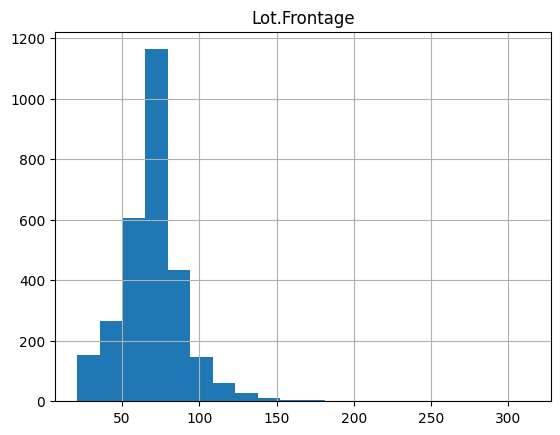

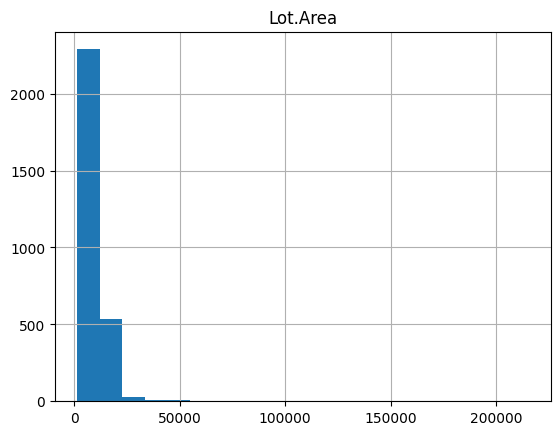

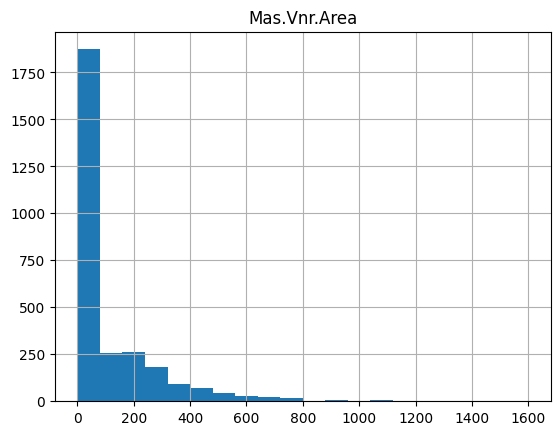

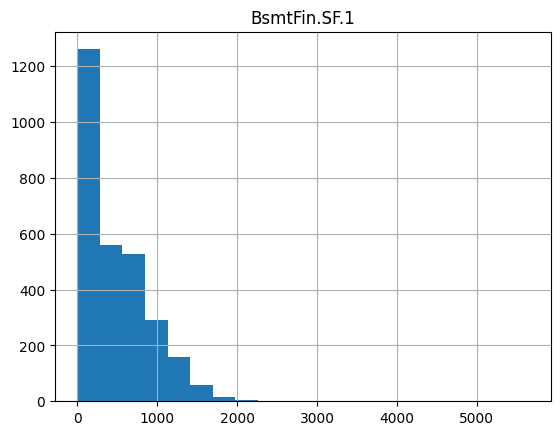

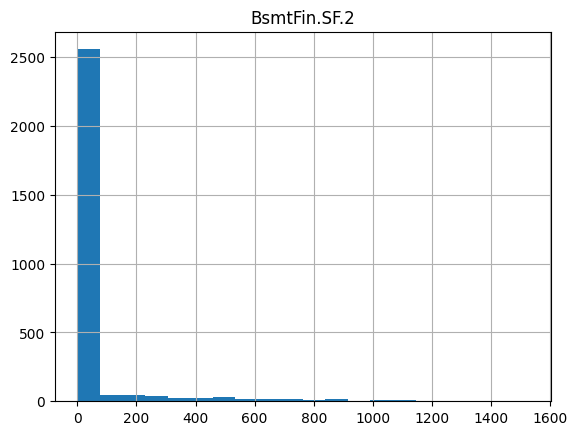

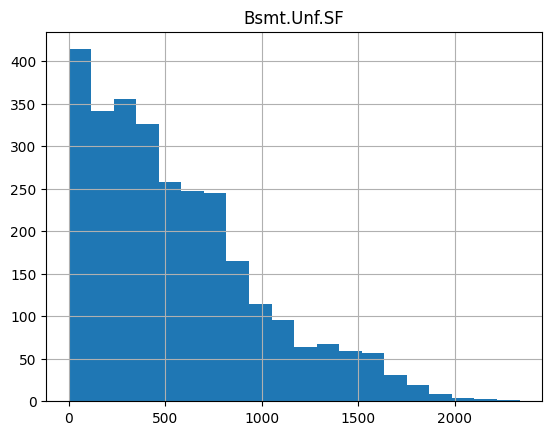

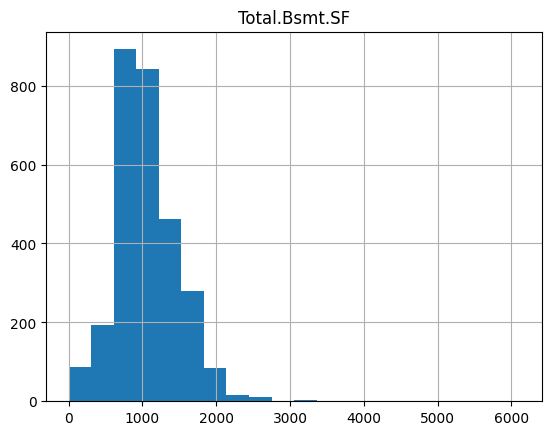

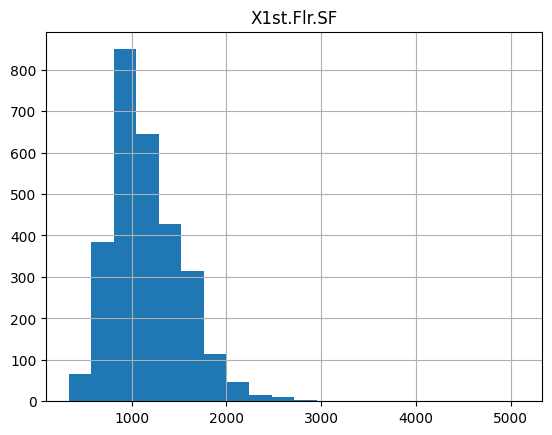

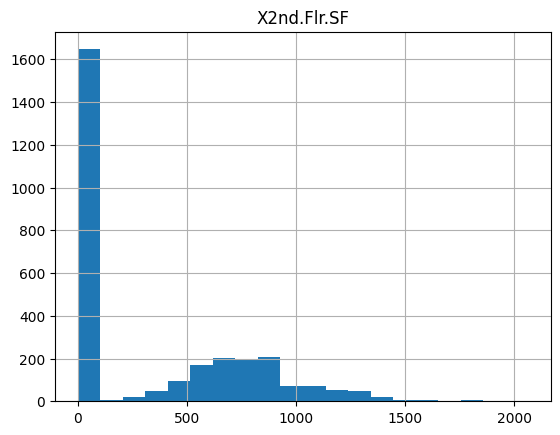

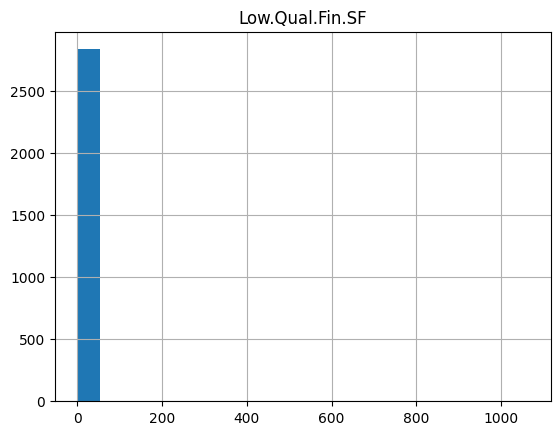

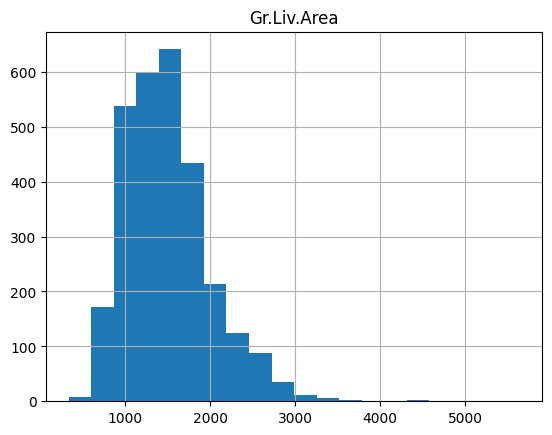

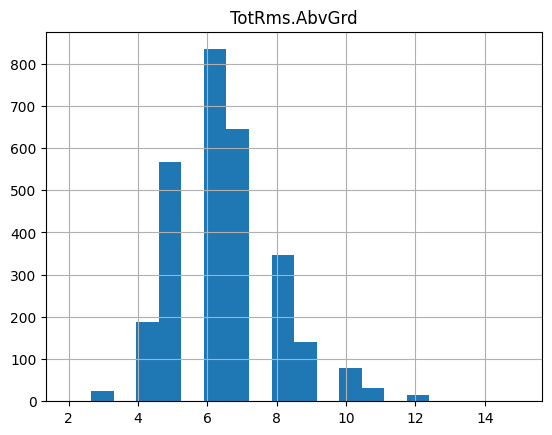

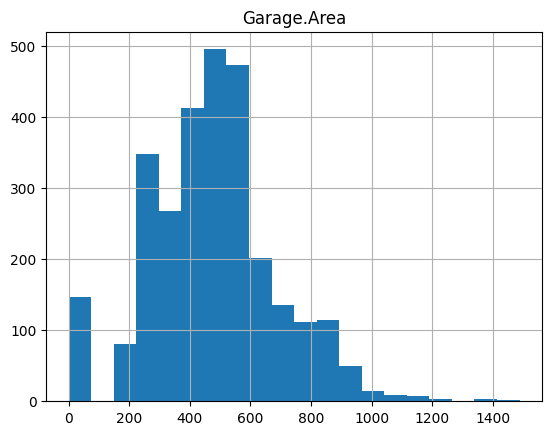

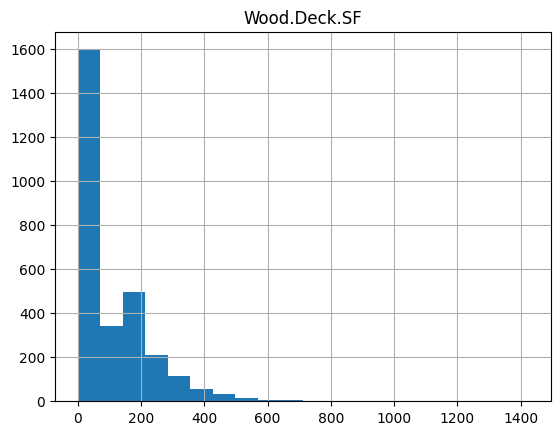

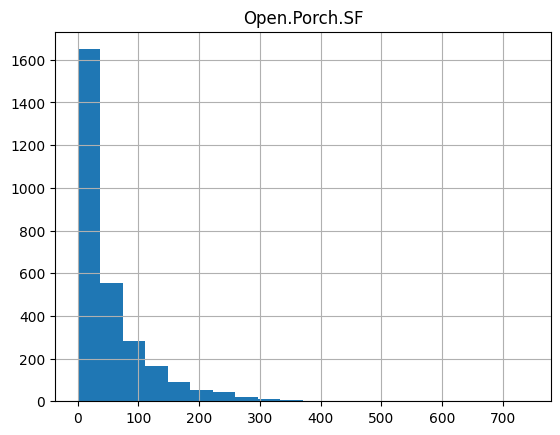

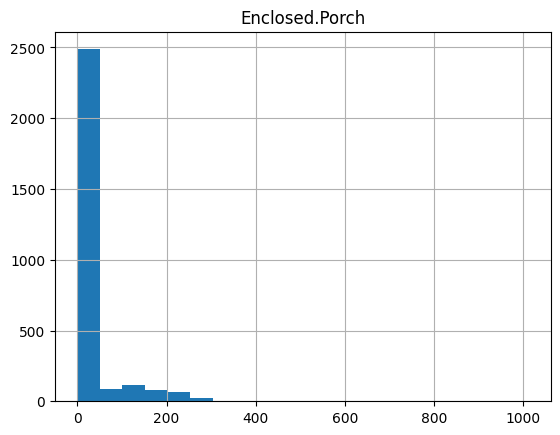

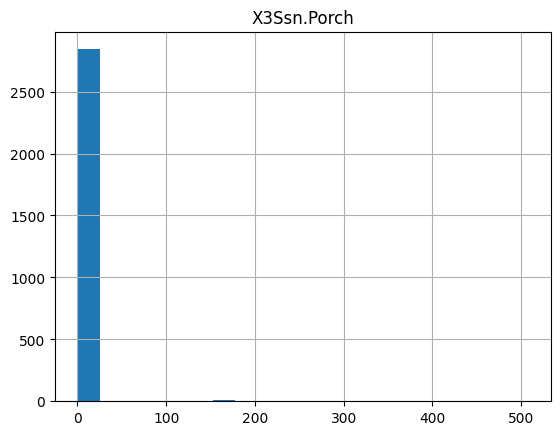

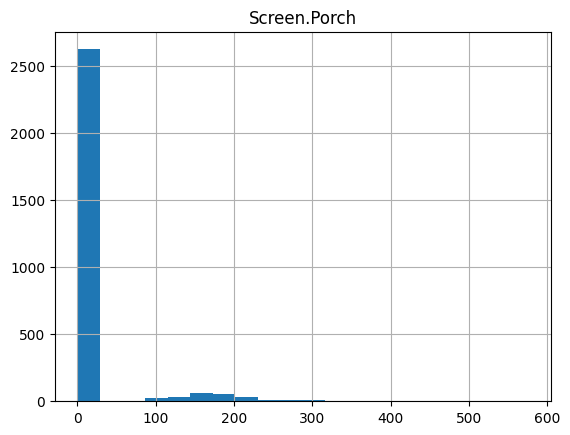

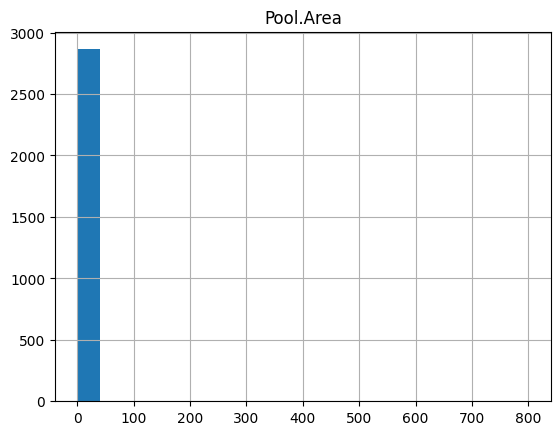

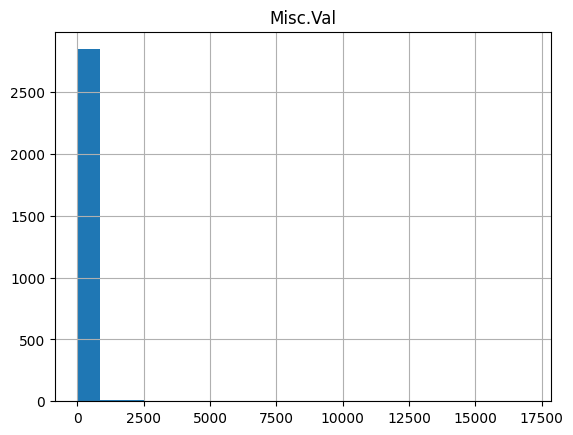

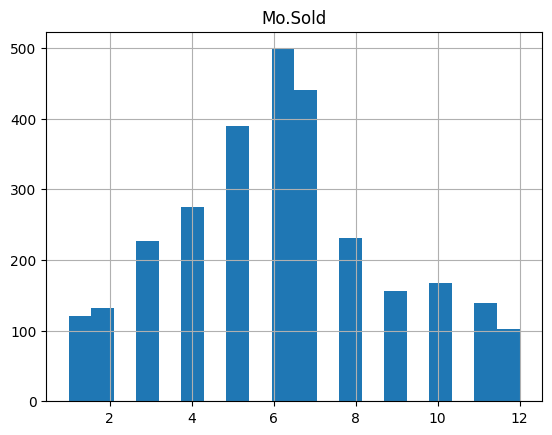

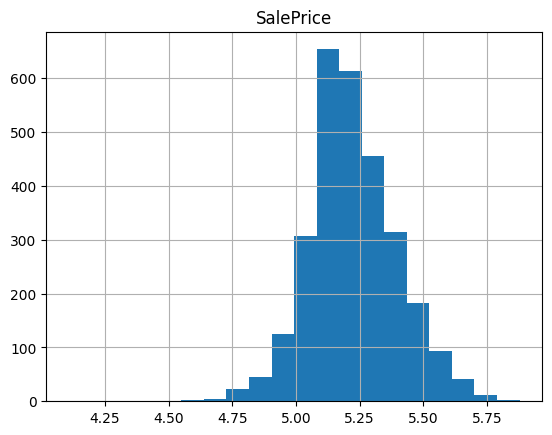

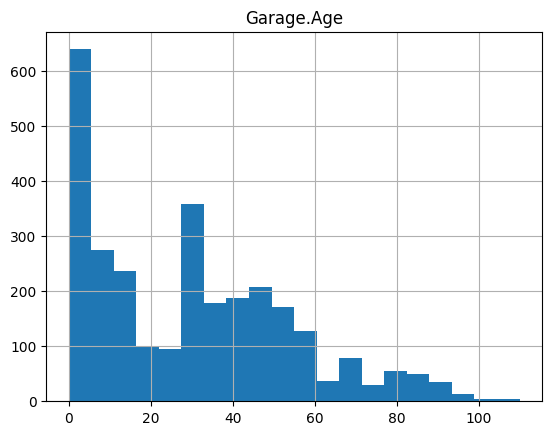

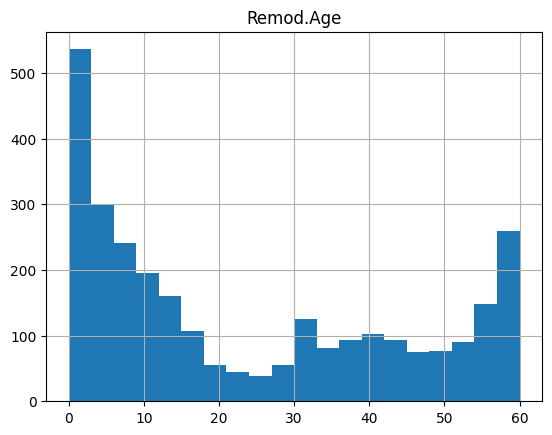

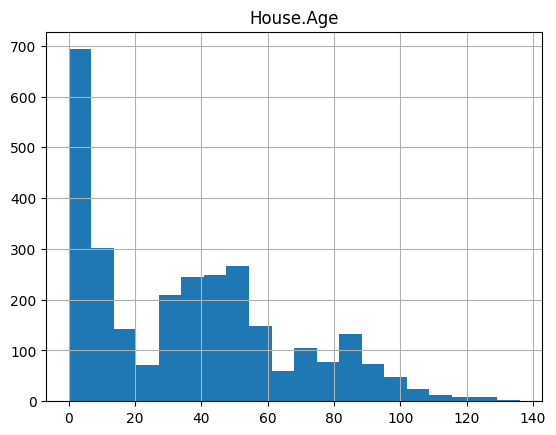

In [16]:
## histograma das variáveis contínuas
for col in continuas_colums:
    model_data[col].hist(bins=20)
    plt.title(col)
    plt.show()

In [17]:
## passando o log nas variáveis contínuas
for col in continuas_colums:
    model_data[col] = np.log(model_data[col] + 1)

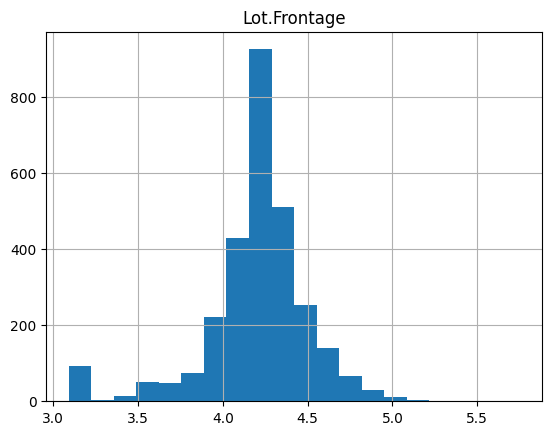

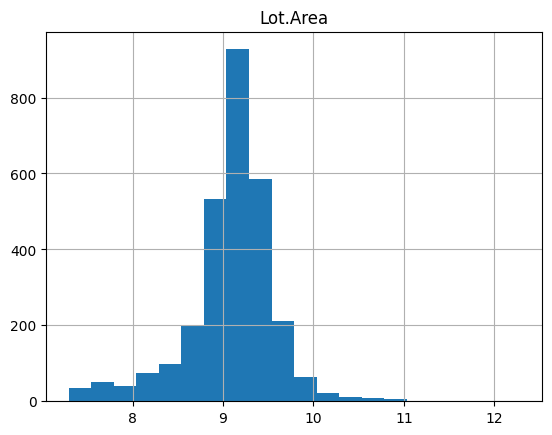

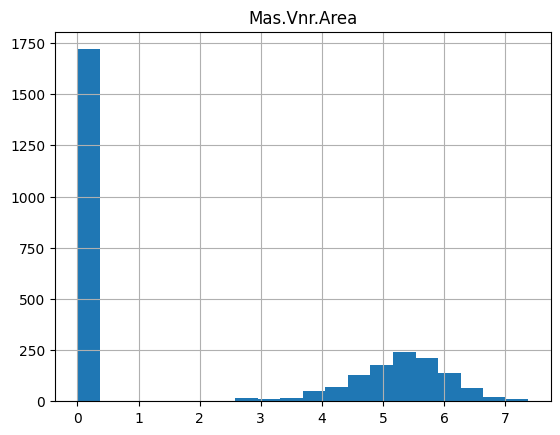

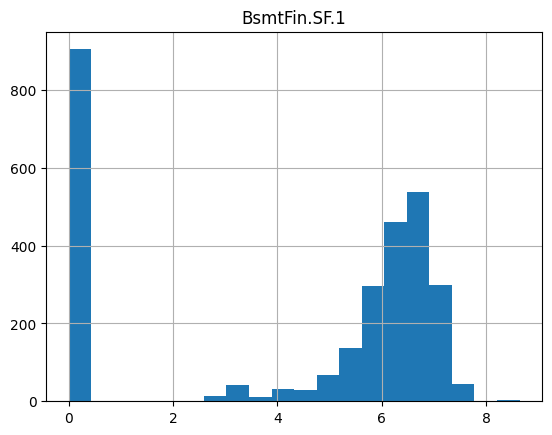

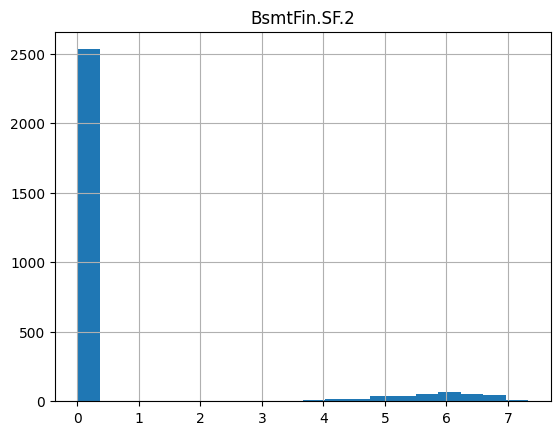

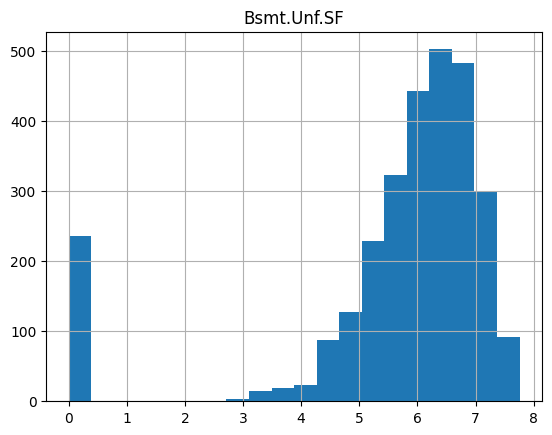

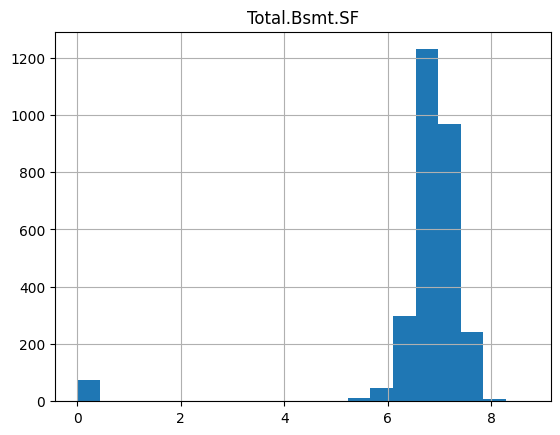

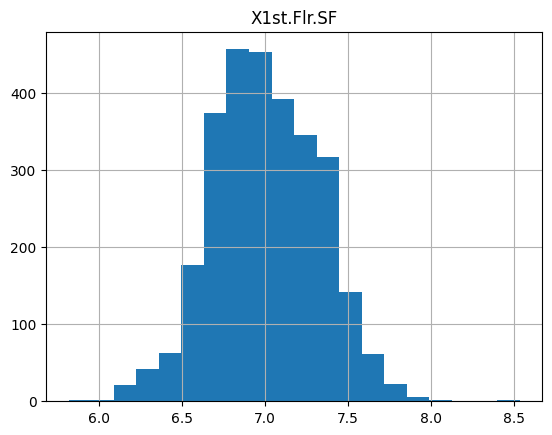

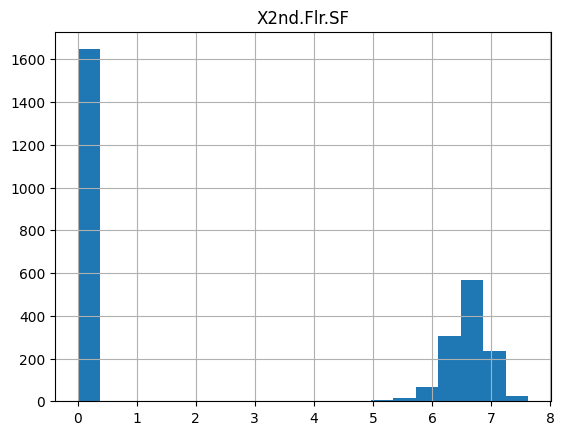

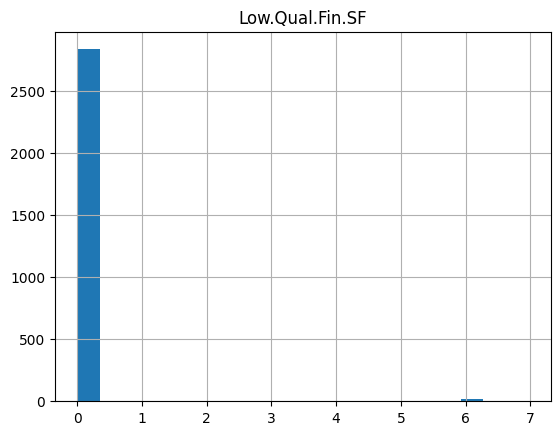

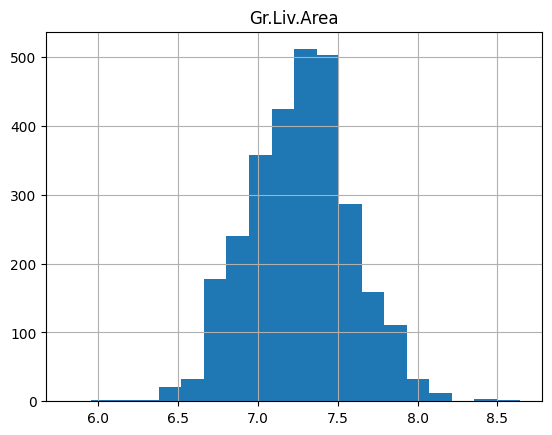

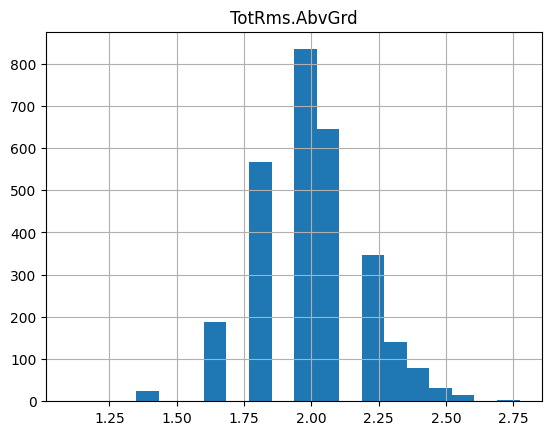

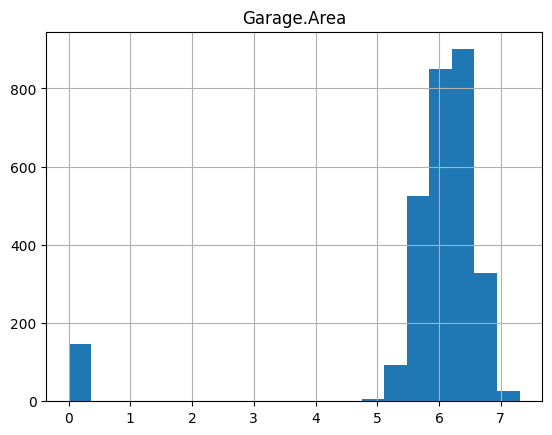

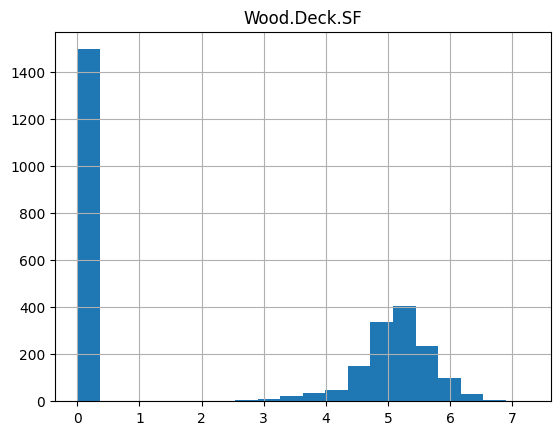

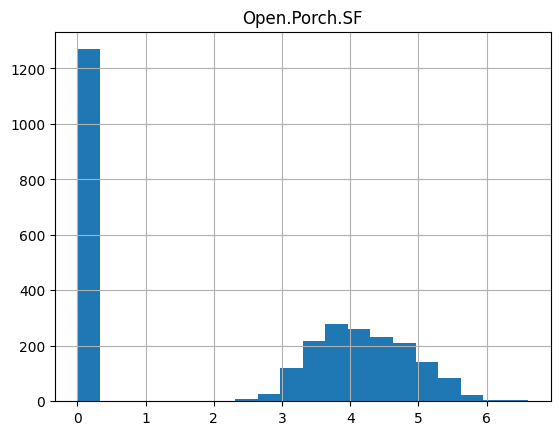

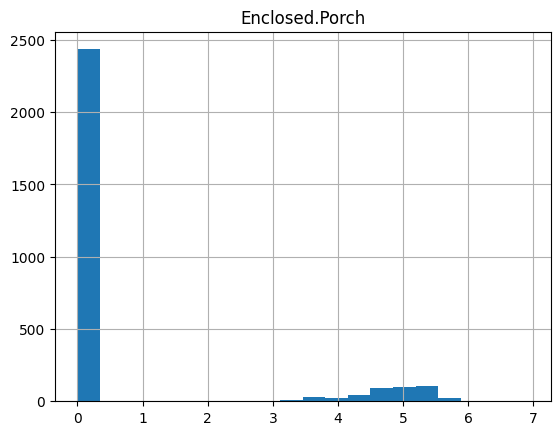

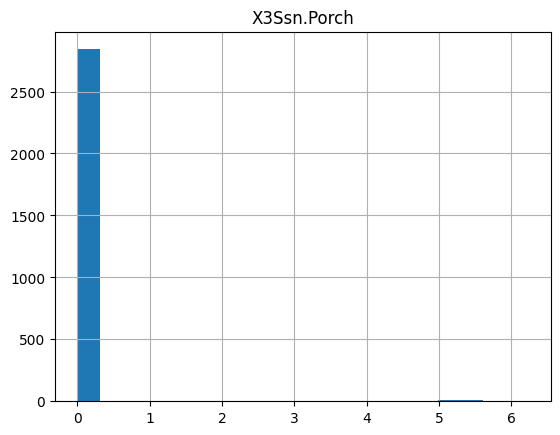

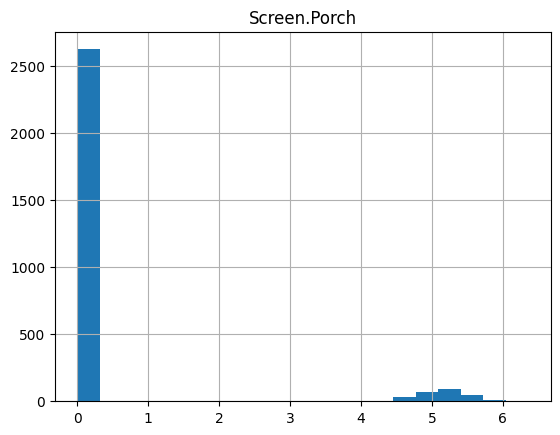

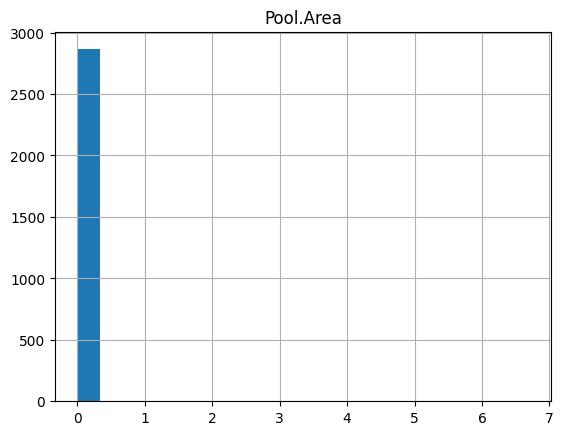

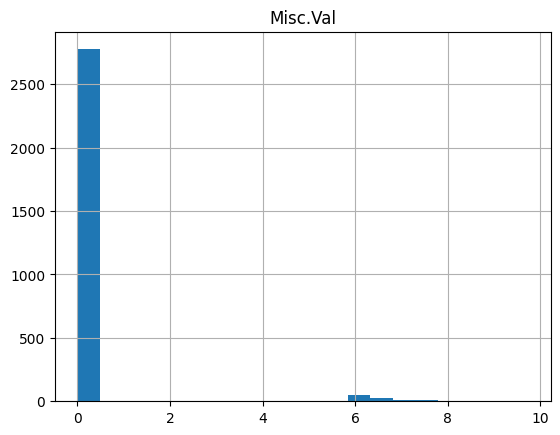

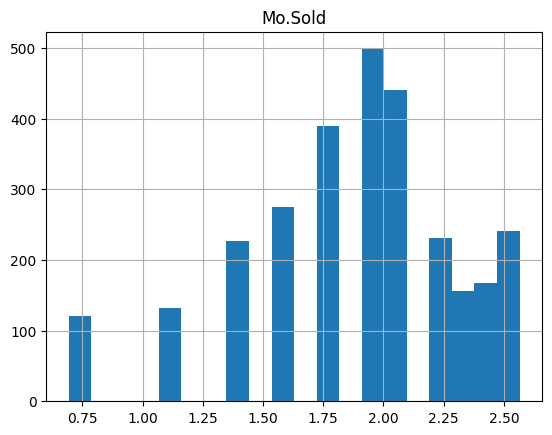

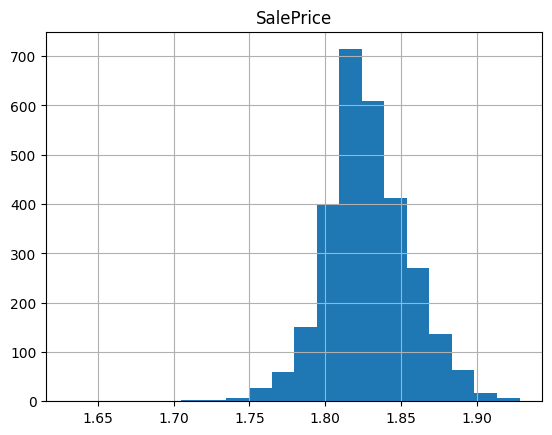

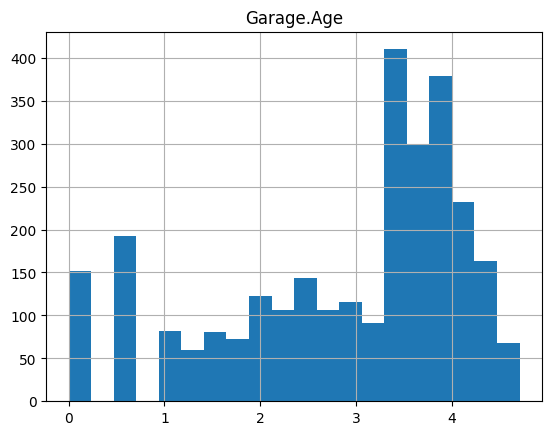

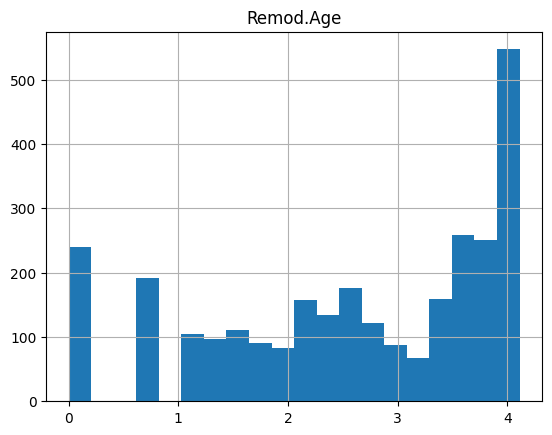

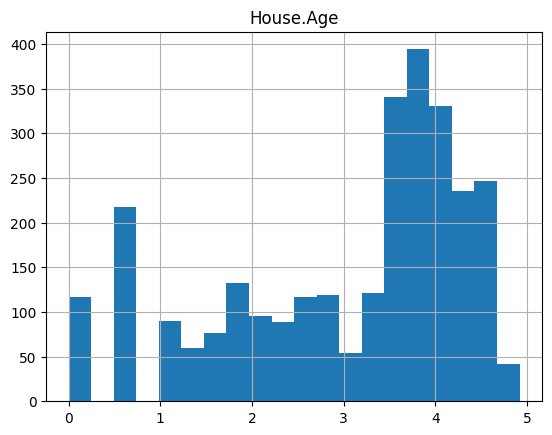

In [18]:
## grafico da distribuição da transformada
for col in continuas_colums:
    model_data[col].hist(bins=20)
    plt.title(col)
    plt.show()

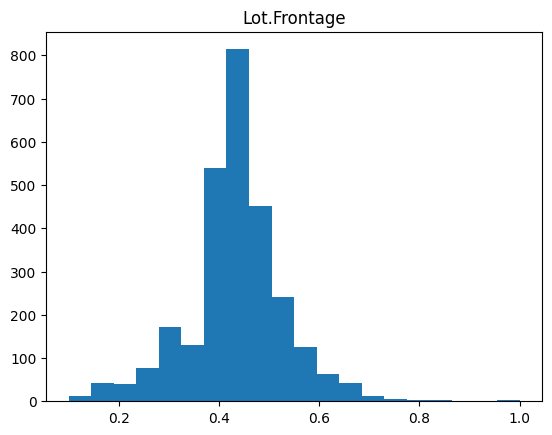

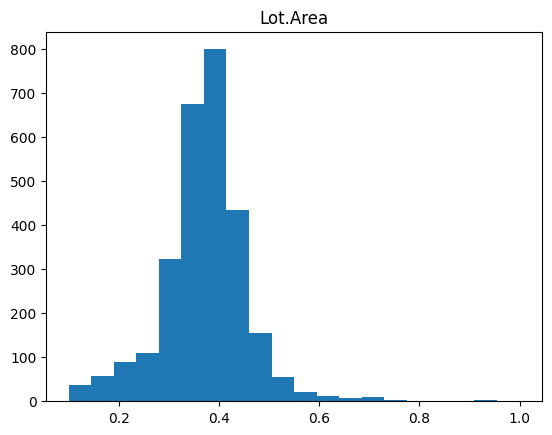

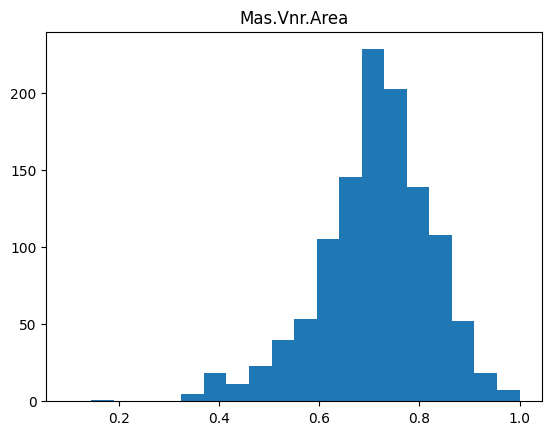

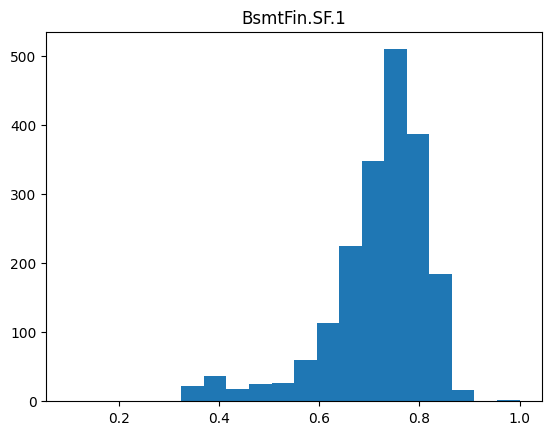

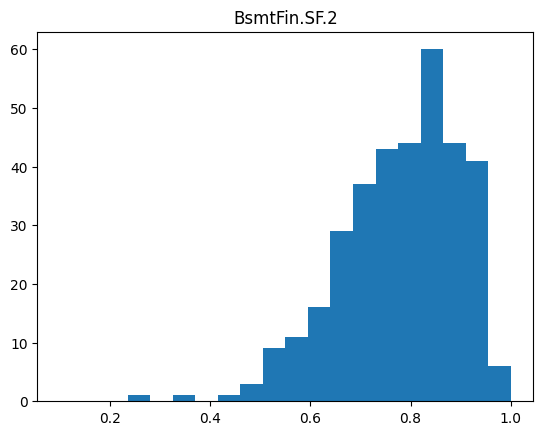

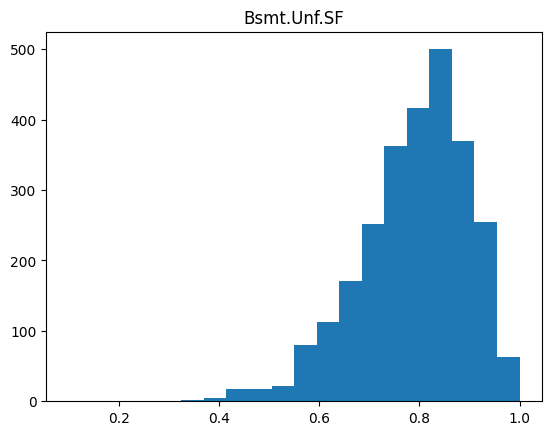

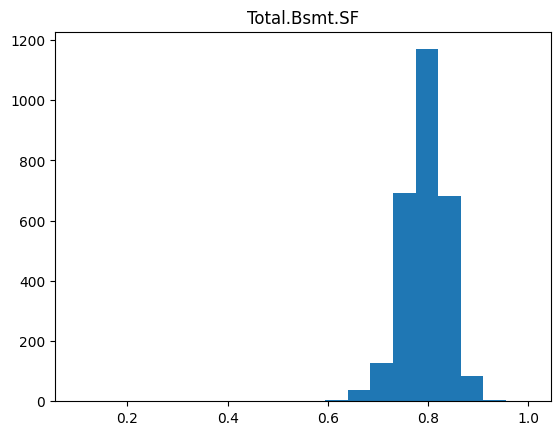

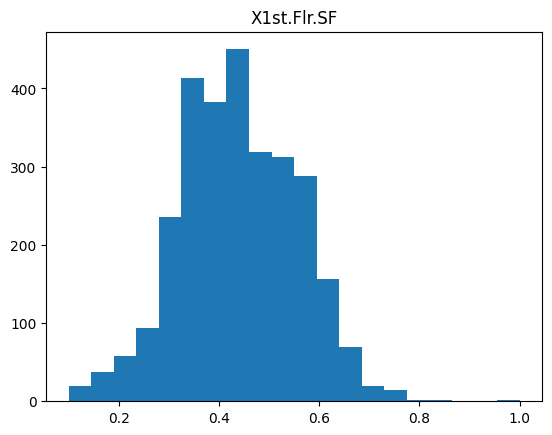

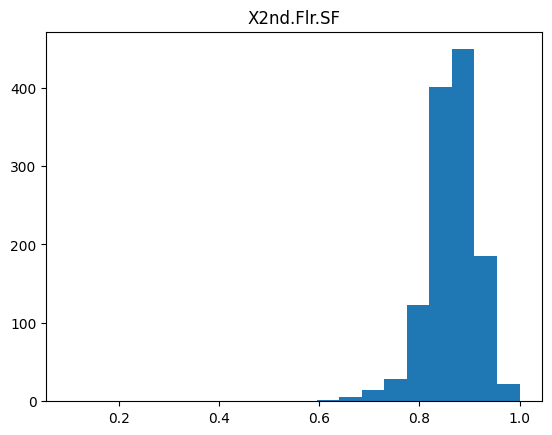

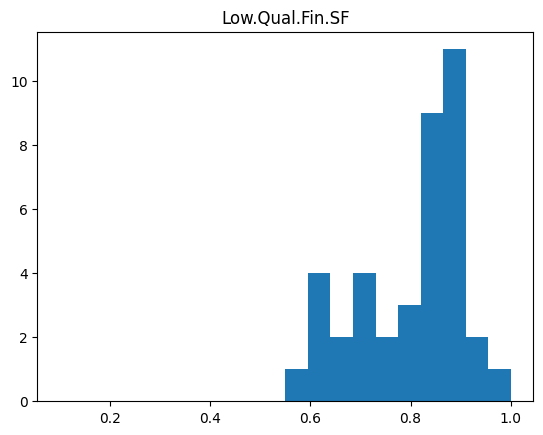

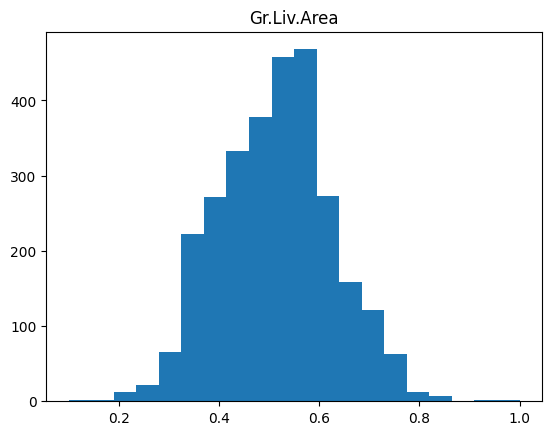

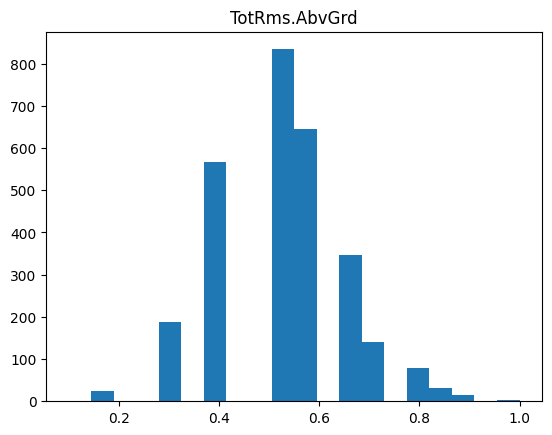

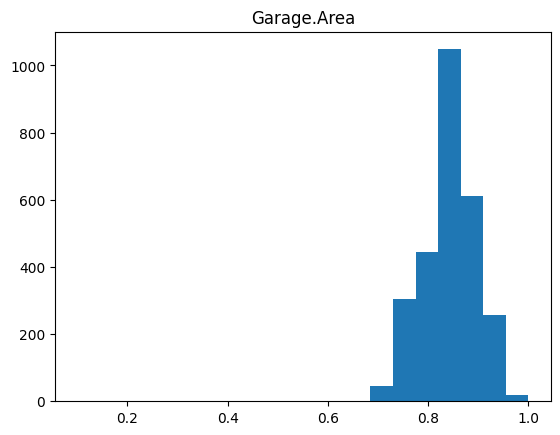

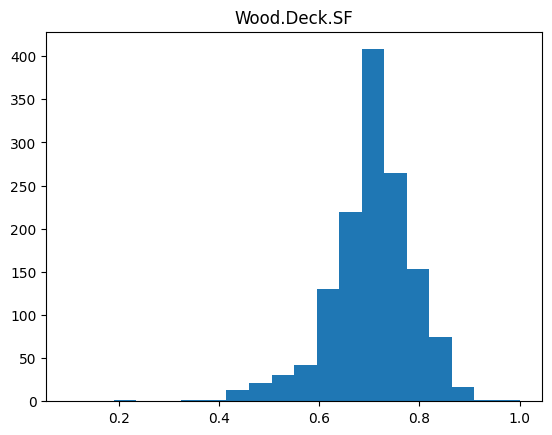

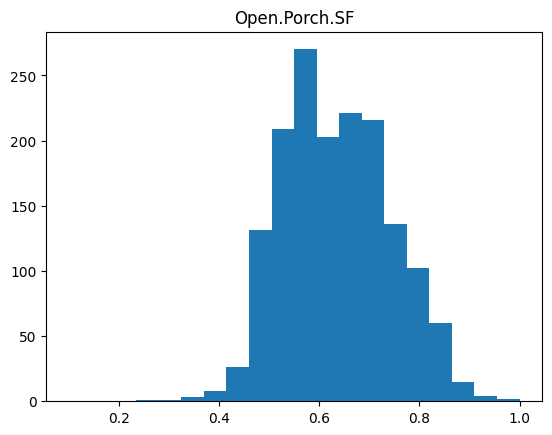

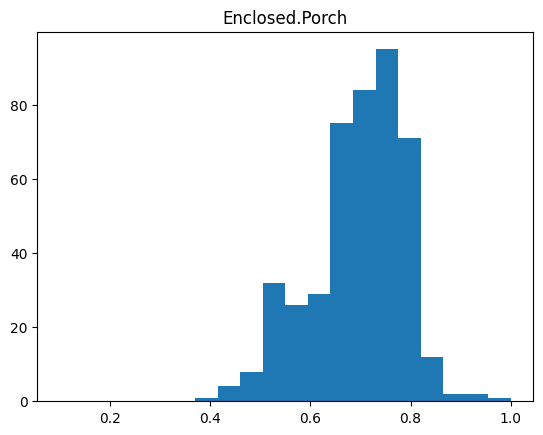

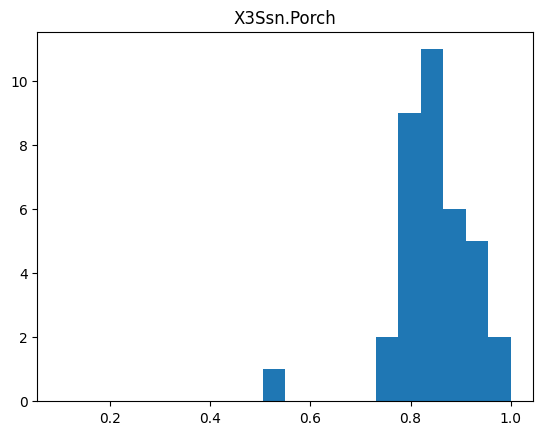

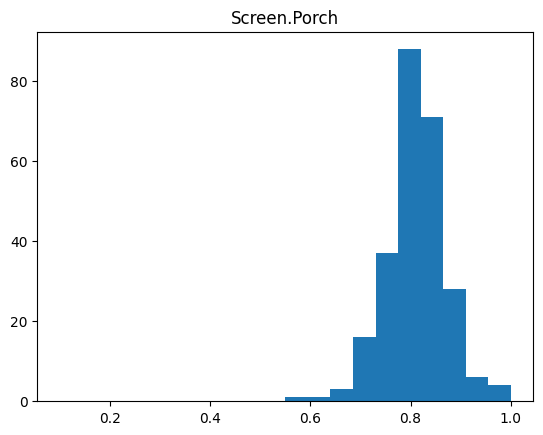

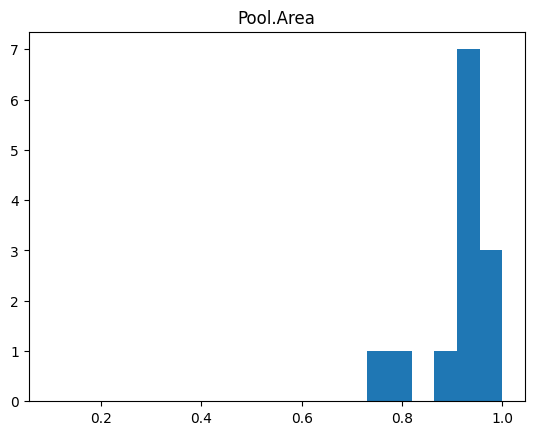

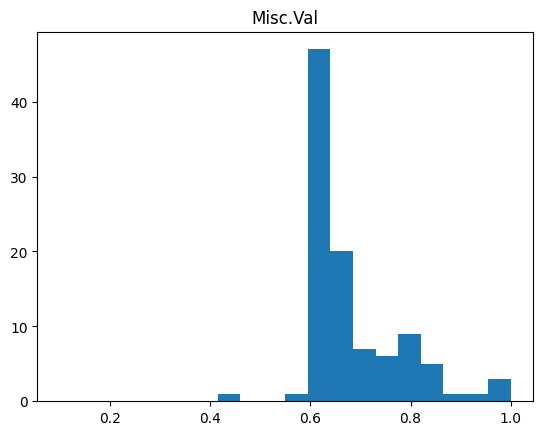

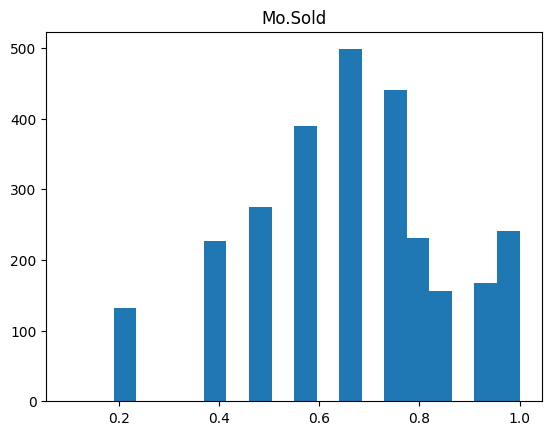

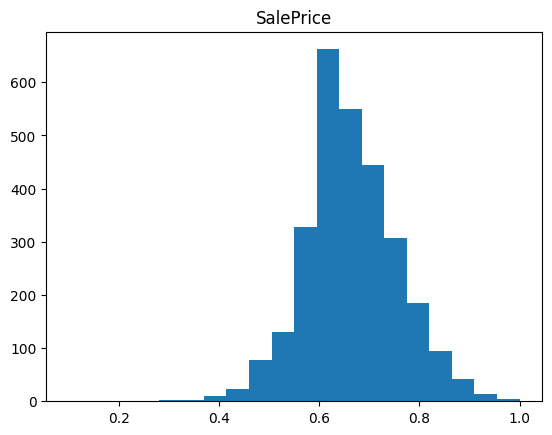

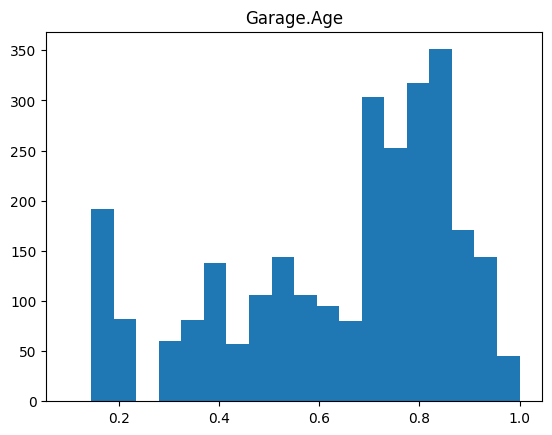

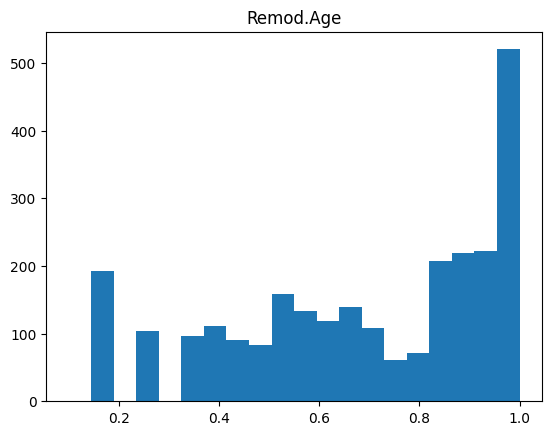

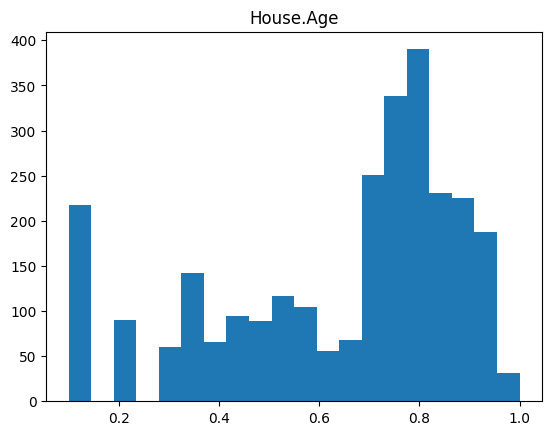

In [25]:
## temos problemas de saturação nas variáveis
## vamos normalizar as variáveis
## normalização min max
for col in continuas_colums:
    model_data[col] = (model_data[col] - model_data[col].min()) / (model_data[col].max() - model_data[col].min())

## grafico da distribuição da transformada
for col in continuas_colums:
    plt.hist(model_data[col], bins=20, range=(0.1, 1.0))  # Especifica o intervalo desejado no eixo x
    plt.title(col)
    plt.show()



In [31]:
model_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category


In [37]:
# criando novas variáveis
# qualidade geral da casa
model_data['OverallGrade'] = model_data['Overall.Qual'].cat.codes * model_data['Overall.Cond'].cat.codes
#oughtOffPlan: variável binária que indica se a casa foi comprada em um plano especial de compra (como parcial) 
# ou sob condições normais. Se foi comprada sob condições normais, o valor será 0; caso contrário, será 1
model_data['BoughtOffPlan'] = model_data['Sale.Condition'].replace({'Abnorml': 0, 'Alloca': 0, 'AdjLand': 0, 'Family': 0, 'Normal': 0, 'Partial': 1})


